In [66]:
import numpy as np
import pandas as pd

In [67]:
df = pd.read_csv('tweets-engagement-metrics.csv')
df.head()

Unnamed: 0         UserID   Gender  LocationID     City    State StateCode  \
0           0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL   
1           1    tw-27229880     Male         2.0   Tirana   Tirane        AL   
2           2    tw-27229880     Male         2.0   Tirana   Tirane        AL   
3           3    tw-27229880     Male         2.0   Tirana   Tirane        AL   
4           4    tw-27229880     Male         2.0   Tirana   Tirane        AL   

   Country                TweetID  Hour  Day   Weekday  IsReshare  Reach  \
0  Albania  tw-698155297102295041     7   12    Friday       True  339.0   
1  Albania  tw-685159757209059329    11    7  Thursday      False   87.0   
2  Albania  tw-686907710311378944     6   12   Tuesday      False   87.0   
3  Albania  tw-686968158050201600    10   12   Tuesday      False   87.0   
4  Albania  tw-690210449674092545     9   21  Thursday      False   85.0   

   RetweetCount  Likes  Klout  Sentiment Lang  \
0         127.0    0.0   44.0        0.0   en   
1           0.0    0.0   22.0        0.0   en   
2           0.0    0.0   22.0        0.0   en   
3           0.0    0.0   22.0        0.0   en   
4           0.0    0.0   21.0        0.0   en   

                                                text  
0  "RT @AdrianRusso82: Our Innovation Lab is offi...  
1  Now Open  AWS Asia Pacific (Seoul) Region via ...  
2  A Beginner's Guide to Scaling to 11 Million+ U...  
3  Bridging AWS and Azure environments via VPN vi...  
4  ELK on AWS ElasticSearch Service + ElasticBean...

In [68]:
df = df.drop('Unnamed: 0', axis=1)

In [69]:
df.head()

UserID   Gender  LocationID     City    State StateCode  Country  \
0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL  Albania   
1    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
2    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
3    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
4    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   

                 TweetID  Hour  Day   Weekday  IsReshare  Reach  RetweetCount  \
0  tw-698155297102295041     7   12    Friday       True  339.0         127.0   
1  tw-685159757209059329    11    7  Thursday      False   87.0           0.0   
2  tw-686907710311378944     6   12   Tuesday      False   87.0           0.0   
3  tw-686968158050201600    10   12   Tuesday      False   87.0           0.0   
4  tw-690210449674092545     9   21  Thursday      False   85.0           0.0   

   Likes  Klout  Sentiment Lang  \
0    0.0   44.0        0.0   en   
1    0.0   22.0        0.0   en   
2    0.0   22.0        0.0   en   
3    0.0   22.0        0.0   en   
4    0.0   21.0        0.0   en   

                                                text  
0  "RT @AdrianRusso82: Our Innovation Lab is offi...  
1  Now Open  AWS Asia Pacific (Seoul) Region via ...  
2  A Beginner's Guide to Scaling to 11 Million+ U...  
3  Bridging AWS and Azure environments via VPN vi...  
4  ELK on AWS ElasticSearch Service + ElasticBean...

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        102062 non-null  object 
 1   Gender        102062 non-null  object 
 2   LocationID    102062 non-null  float64
 3   City          99783 non-null   object 
 4   State         100165 non-null  object 
 5   StateCode     100336 non-null  object 
 6   Country       102062 non-null  object 
 7   TweetID       102062 non-null  object 
 8   Hour          102062 non-null  int64  
 9   Day           102062 non-null  int64  
 10  Weekday       102062 non-null  object 
 11  IsReshare     102062 non-null  bool   
 12  Reach         102062 non-null  float64
 13  RetweetCount  102062 non-null  float64
 14  Likes         102062 non-null  float64
 15  Klout         102062 non-null  float64
 16  Sentiment     102062 non-null  float64
 17  Lang          102062 non-null  object 
 18  text

Data onsists of 102,062 rows and 19 columns. Each column represents different attributes such as user ID, gender, location, tweet details, and sentiment scores, with various data types including objects, floats, integers, and booleans, occupying approximately 14.1 MB of memory.

In [71]:
import plotly.express as px

In [72]:
scatter_fig = px.scatter(df, x="Reach", y="Likes", color="Sentiment", title='Reach vs Likes')
scatter_fig.show()

The above show how most likes are around the reach of 500K and the sentiment score is mostly neutral.
The least are negative, but very few negative posts have higher reach.

In [8]:
df['Likes'].unique()

array([  0., 131.,  40.,  70.,  22.,  26.,  72.,  32.,   7.,  21., 116.,
         9.,  11.,  14.,  30.,  25.,  35.,  34.,  18.,  19.,  43.,  49.,
        56.,  28.,  10.,   8.,  50.,  77.,  23.,  37.,  45.,  44.,  68.,
        17.,  96.,  15.,   1.,  33.,  27.,  69.,  48.,  20.,  16.,  36.,
        29.,  58.,  38.,  64.,  42.,   3.,  13.,   4.,  93.,  53.,  24.,
         6., 133.,  55.,  31.,  95.,  61.,  85.,  39.,  12.,  74.,  41.,
        67.,  88.,  65.,  51.,  94.,  63.,  52.,   2.,  47., 113.,  89.,
        54.,   5.,  75.,  60.,  62.,  92.,  59., 107.,  79.,  57.])

In [74]:
bar = px.histogram(df, x="Weekday", title='Weekday Distribution')
bar.show()

Show there are lesser tweets on Weekends.

In [75]:
# Tweet Frequency per Language

count_lang = df["Lang"].value_counts().reset_index()
count_lang.columns = ["Language", "Count"]

lang_fig = px.line(count_lang, x='Language',y='Count', markers=True, title='Tweet Frequency per Language')
lang_fig.show()

The tweets are mostly in English.

In [13]:
# Users active over time
# Group by Hour and calculate the count of users active

user_per_hour = df.groupby('Hour')['UserID'].count().reset_index()
user_per_hour    

user_per_hour['UserCount'] = user_per_hour['UserID']
line_user_fig = px.line(user_per_hour, x='Hour', y='UserCount', title='Users active over Time')

line_user_fig.show()

Users are most active arount 10 AM in the morning, which is peak. The number of users decrease ealier in the morning or later in the evening.

In [76]:
#Like over Mood

df['Mood'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x==0 else 'Negative'))
df['Mood']

0          Neutral
1          Neutral
2          Neutral
3          Neutral
4          Neutral
            ...   
102057    Positive
102058     Neutral
102059    Positive
102060     Neutral
102061     Neutral
Name: Mood, Length: 102062, dtype: object

In [77]:
like_per_mood = df.groupby('Mood')['Likes'].sum().reset_index()
like_per_mood


Mood    Likes
0  Negative    194.0
1   Neutral  10297.0
2  Positive   4786.0

In [78]:
hist_fig = px.histogram(like_per_mood, x='Mood', y='Likes', color='Mood', title='Likes Over Mood')
hist_fig.show()

Inspecting and Cleansing the Dataset
Remove URL protocol with trailing whitespace, at signs with leading spaces, non-alphanumerical
Replace at signs with "at" and convert all to lowercase


In [80]:
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# convert text to lower case
df.text =df.text.str.lower()
# Remove @ from the text
df.text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df.text)
#Remove twitter handlers
df.text = df.text.apply(lambda x:re.sub('@[^\s]+','',x))
#remove hashtags
df.text = df.text.apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove URLS
df.text = df.text.apply(lambda x:re.sub(r"http\S+", "", x))
# Remove all the special characters
df.text = df.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))
#remove all single characters
df.text = df.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Substituting multiple spaces with single space
df.text = df.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_20668\2439207171.py", line 27, in <module>
    df.text = df.text.apply(lambda x:' '.join([word for word in df.text.split() if word not in stop_words]))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\apply.py", line 1025, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\

In [18]:
df.head()

UserID   Gender  LocationID     City    State StateCode  Country  \
0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL  Albania   
1    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
2    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
3    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
4    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   

                 TweetID  Hour  Day   Weekday  IsReshare  Reach  RetweetCount  \
0  tw-698155297102295041     7   12    Friday       True  339.0         127.0   
1  tw-685159757209059329    11    7  Thursday      False   87.0           0.0   
2  tw-686907710311378944     6   12   Tuesday      False   87.0           0.0   
3  tw-686968158050201600    10   12   Tuesday      False   87.0           0.0   
4  tw-690210449674092545     9   21  Thursday      False   85.0           0.0   

   Likes  Klout  Sentiment Lang  \
0    0.0   44.0        0.0   en   
1    0.0   22.0        0.0   en   
2    0.0   22.0        0.0   en   
3    0.0   22.0        0.0   en   
4    0.0   21.0        0.0   en   

                                                text     Mood  
0  rt our innovation lab is officially open click...  Neutral  
1  now open aws asia pacific seoul region viasysa...  Neutral  
2  a beginnerguide to scaling to 11 million users...  Neutral  
3  bridging aws and azure environments via vpn vi...  Neutral  
4  elk on aws elasticsearch service elasticbeanst...  Neutral

Tokenization
Convert the text from the tweets into a form we can process algorithmically by Tokenization our text to split it into separate words.

In [19]:
from nltk.tokenize import RegexpTokenizer

# tokenizer for words, i.e. any length word (alphanumeric) characters separated by a whitespace
tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["text"].apply(tokenizer.tokenize)
df.head()

UserID   Gender  LocationID     City    State StateCode  Country  \
0  tw-1267804344  Unknown         1.0  Elbasan  Elbasan        AL  Albania   
1    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
2    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
3    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   
4    tw-27229880     Male         2.0   Tirana   Tirane        AL  Albania   

                 TweetID  Hour  Day  ... IsReshare  Reach  RetweetCount  \
0  tw-698155297102295041     7   12  ...      True  339.0         127.0   
1  tw-685159757209059329    11    7  ...     False   87.0           0.0   
2  tw-686907710311378944     6   12  ...     False   87.0           0.0   
3  tw-686968158050201600    10   12  ...     False   87.0           0.0   
4  tw-690210449674092545     9   21  ...     False   85.0           0.0   

   Likes  Klout  Sentiment  Lang  \
0    0.0   44.0        0.0    en   
1    0.0   22.0        0.0    en   
2    0.0   22.0        0.0    en   
3    0.0   22.0        0.0    en   
4    0.0   21.0        0.0    en   

                                                text     Mood  \
0  rt our innovation lab is officially open click...  Neutral   
1  now open aws asia pacific seoul region viasysa...  Neutral   
2  a beginnerguide to scaling to 11 million users...  Neutral   
3  bridging aws and azure environments via vpn vi...  Neutral   
4  elk on aws elasticsearch service elasticbeanst...  Neutral   

                                              tokens  
0  [rt, our, innovation, lab, is, officially, ope...  
1  [now, open, aws, asia, pacific, seoul, region,...  
2  [a, beginnerguide, to, scaling, to, 11, millio...  
3  [bridging, aws, and, azure, environments, via,...  
4  [elk, on, aws, elasticsearch, service, elastic...  

[5 rows x 21 columns]

Now we can check the distribution of our dataset with respect to the words contained therein, which is the vocabulary of the dataset:

In [20]:
# get a list of all words in the tokenized tweets 
all_words = [word for tokens in df["tokens"] for word in tokens]

# get a list of tweet lengths in the set tokenized tweets
sentence_lengths = [len(tokens) for tokens in df["tokens"]]

# list all unique words in the dataset and sort it for future convenience
vocab = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, vocabulary size of {len(vocab)}')
print(f'Max sentence length is {max(sentence_lengths)}')


1190945 words total, vocabulary size of 44068
Max sentence length is 30


In [21]:
sentence_lengths[0]

12

In [22]:
df["tokens"][0]

['rt',
 'our',
 'innovation',
 'lab',
 'is',
 'officially',
 'open',
 'click',
 'below',
 'to',
 'learn',
 'more']

Plot the results to visualize

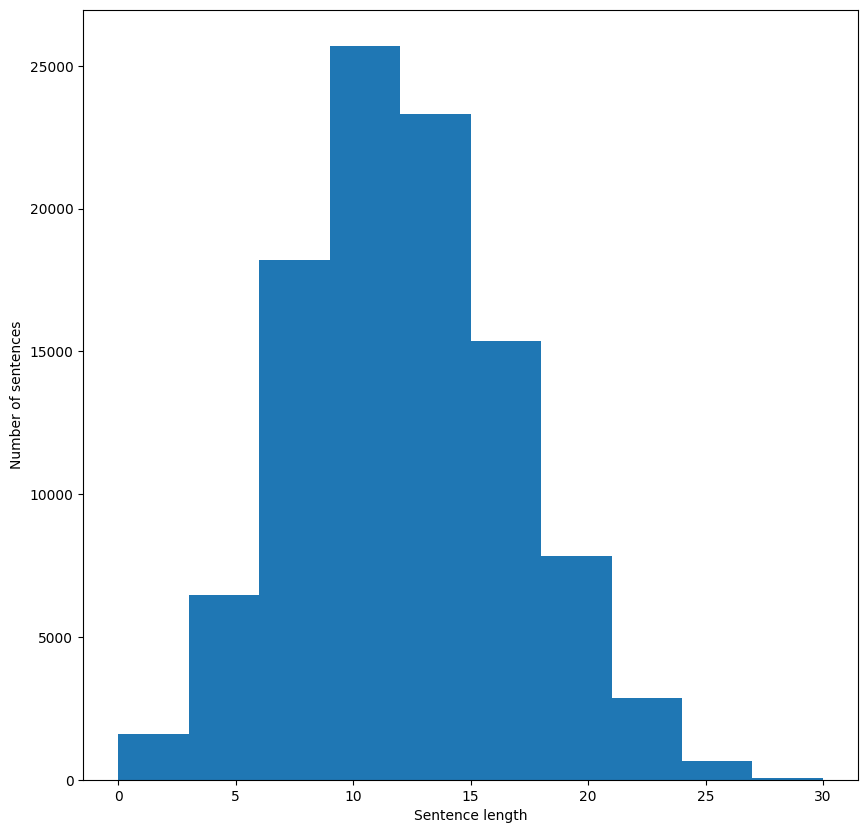

In [23]:
import matplotlib.pyplot as plt

# plot histogram of sentence lengths vs their frequency of occurence 
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [26]:
# Function to count tokens for each mood
def count_tokens(df):
    # Explode the tokens list so each token becomes a separate row
    df_exploded = df.explode('tokens')
    
    # Group by Mood and count the number of tokens
    token_counts = df_exploded.groupby('Mood')['tokens'].count()
    
    return token_counts

# Get the token counts for each mood
token_counts = count_tokens(df)

print(token_counts)

Mood
Negative     78234
Neutral     750671
Positive    362040
Name: tokens, dtype: int64


In [38]:
'''from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
import random 
import nltk
nltk.download('vader_lexicon')

# For sentiment analysis 
sia = SIA()

# Extract Sentiment Values for each text 
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['text'])]
df['overall_sentiment'] = df['sentiment'].apply(df['Mood'])

def flatten_list(l):
    return [x for y in l for x in y]

# color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative texts")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")
    
    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

    
sentiment_sorted= df.sort_values('Hour', ascending=False)
positive_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "positive"].iloc[:100]
negative_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "negative"].iloc[:100]
neutral_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "neutral"].iloc[:100]

cleanup = lambda x: [y for y in x.split() if y not in stopwords.words('english')]
neg_doc = flatten_list(negative_top_100['text'].apply(cleanup))
pos_doc = flatten_list(positive_top_100['text'].apply(cleanup))
neu_doc = flatten_list(neutral_top_100['text'].apply(cleanup))

generate_word_clouds(neg_doc, neu_doc, pos_doc)'''

'from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA\nfrom wordcloud import WordCloud\nfrom nltk.corpus import stopwords\nfrom tqdm.notebook import tqdm\nimport random \nimport nltk\nnltk.download(\'vader_lexicon\')\n\n# For sentiment analysis \nsia = SIA()\n\n# Extract Sentiment Values for each text \ndf[\'sentiment\'] = [sia.polarity_scores(x)[\'compound\'] for x in tqdm(df[\'text\'])]\ndf[\'overall_sentiment\'] = df[\'sentiment\'].apply(df[\'Mood\'])\n\ndef flatten_list(l):\n    return [x for y in l for x in y]\n\n# color coding our wordclouds \ndef red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):\n    return f"hsl(0, 100%, {random.randint(25, 75)}%)" \n\ndef green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):\n    return f"hsl({random.randint(90, 150)}, 100%, 30%)" \n\ndef yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):\n    return f"hsl(42, 100%, {random.randi

Text Embeddings
Convert text into embeddings for use in NLP algorithms. Embeddings are an encoded representation of text that makes it more feasible and efficient for machine learning algorithms to process it.

Bag of words is the simplest approach, where we embed all words in our vocabulary into a vector - the index of each element in the vector corresponds to a word in the dataset's vocabulary, and the value at each index is the number of times a word appears in a sentence. Each sentence will be embedded into one such vector.

1. Lemmatizers work on English, let's remove other languages from the dataset.
2. Stop words are the words that will not continue to the sentiment as a tweet. Stemming is removing any derivative and replacing then with the core of the word.

Removing the stop words with the maximum limit of the text being 5000 characters.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# transform tweets to vectorized bag of word embedding
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(df['text']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Replacing the words with their stems

In [41]:
import nltk
from nltk.stem.porter import *

ps = PorterStemmer()

In [42]:
def stem(text) :
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
df['text'] = df['text'].apply(stem)
df

UserID   Gender  LocationID      City            State  \
0       tw-1267804344  Unknown         1.0   Elbasan          Elbasan   
1         tw-27229880     Male         2.0    Tirana           Tirane   
2         tw-27229880     Male         2.0    Tirana           Tirane   
3         tw-27229880     Male         2.0    Tirana           Tirane   
4         tw-27229880     Male         2.0    Tirana           Tirane   
...               ...      ...         ...       ...              ...   
102057     tw-8184962     Male      6288.0    Harare  Harare Province   
102058  tw-2510632527  Unknown      6288.0    Harare  Harare Province   
102059   tw-148753637  Unknown      6288.0    Harare  Harare Province   
102060   tw-448919812   Unisex      6288.0    Harare  Harare Province   
102061   tw-252561397  Unknown      6289.0  Bulawayo         Bulawayo   

       StateCode   Country                TweetID  Hour  Day  ...   Reach  \
0             AL   Albania  tw-698155297102295041     7   12  ...   339.0   
1             AL   Albania  tw-685159757209059329    11    7  ...    87.0   
2             AL   Albania  tw-686907710311378944     6   12  ...    87.0   
3             AL   Albania  tw-686968158050201600    10   12  ...    87.0   
4             AL   Albania  tw-690210449674092545     9   21  ...    85.0   
...          ...       ...                    ...   ...  ...  ...     ...   
102057        ZW  Zimbabwe  tw-696378029526933504    10    7  ...  1203.0   
102058        ZW  Zimbabwe  tw-686895097175228416     5   12  ...   976.0   
102059        ZW  Zimbabwe  tw-709632884269785088     0   15  ...  4876.0   
102060        ZW  Zimbabwe  tw-705055534920163328     8    2  ...   188.0   
102061        ZW  Zimbabwe  tw-701487153818238976    12   21  ...   199.0   

        RetweetCount  Likes  Klout  Sentiment  Lang  \
0              127.0    0.0   44.0        0.0    en   
1                0.0    0.0   22.0        0.0    en   
2                0.0    0.0   22.0        0.0    en   
3                0.0    0.0   22.0        0.0    en   
4                0.0    0.0   21.0        0.0    en   
...              ...    ...    ...        ...   ...   
102057           3.0    0.0   44.0        3.0    en   
102058         102.0    0.0   31.0        0.0    en   
102059           0.0    0.0   49.0        1.0    en   
102060           5.0    0.0   37.0        0.0    en   
102061           3.0    0.0   23.0        0.0    en   

                                                     text      Mood  \
0       rt our innov lab is offici open click below to...   Neutral   
1         now open aw asia pacif seoul region viasysadmin   Neutral   
2       a beginnerguid to scale to 11 million user on ...   Neutral   
3           bridg aw and azur environ via vpn viasysadmin   Neutral   
4       elk on aw elasticsearch servic elasticbeanstal...   Neutral   
...                                                   ...       ...   
102057  rt doe anyon havegood workflow for use aw for ...  Positive   
102058  rt aw csa associ and profession train avail wi...   Neutral   
102059  curiou doe thi chang your opinion on aw be mor...  Positive   
102060  rt new on the aw startup blog what startup sho...   Neutral   
102061  rt 15 top pay it certif in 2016 aw certifi sol...   Neutral   

                                                   tokens sentiment  
0       [rt, our, innovation, lab, is, officially, ope...    0.3818  
1       [now, open, aws, asia, pacific, seoul, region,...    0.0000  
2       [a, beginnerguide, to, scaling, to, 11, millio...    0.0000  
3       [bridging, aws, and, azure, environments, via,...    0.0000  
4       [elk, on, aws, elasticsearch, service, elastic...    0.0000  
...                                                   ...       ...  
102057  [rt, does, anyone, havegood, workflow, for, us...    0.0000  
102058  [rt, aws, csa, associate, and, professional, t...    0.0000  
102059  [curious, does, this, change, your, opinion, o...    0.6590  

Done with the text processing.
Let us label the moods with value (1,2,3) using the Label Encoder object.
Will use thi in a pipeline for further classification.

In [44]:
le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Mood'])
df

UserID   Gender  LocationID      City            State  \
0       tw-1267804344  Unknown         1.0   Elbasan          Elbasan   
1         tw-27229880     Male         2.0    Tirana           Tirane   
2         tw-27229880     Male         2.0    Tirana           Tirane   
3         tw-27229880     Male         2.0    Tirana           Tirane   
4         tw-27229880     Male         2.0    Tirana           Tirane   
...               ...      ...         ...       ...              ...   
102057     tw-8184962     Male      6288.0    Harare  Harare Province   
102058  tw-2510632527  Unknown      6288.0    Harare  Harare Province   
102059   tw-148753637  Unknown      6288.0    Harare  Harare Province   
102060   tw-448919812   Unisex      6288.0    Harare  Harare Province   
102061   tw-252561397  Unknown      6289.0  Bulawayo         Bulawayo   

       StateCode   Country                TweetID  Hour  Day  ...  \
0             AL   Albania  tw-698155297102295041     7   12  ...   
1             AL   Albania  tw-685159757209059329    11    7  ...   
2             AL   Albania  tw-686907710311378944     6   12  ...   
3             AL   Albania  tw-686968158050201600    10   12  ...   
4             AL   Albania  tw-690210449674092545     9   21  ...   
...          ...       ...                    ...   ...  ...  ...   
102057        ZW  Zimbabwe  tw-696378029526933504    10    7  ...   
102058        ZW  Zimbabwe  tw-686895097175228416     5   12  ...   
102059        ZW  Zimbabwe  tw-709632884269785088     0   15  ...   
102060        ZW  Zimbabwe  tw-705055534920163328     8    2  ...   
102061        ZW  Zimbabwe  tw-701487153818238976    12   21  ...   

       RetweetCount  Likes  Klout  Sentiment  Lang  \
0             127.0    0.0   44.0        0.0    en   
1               0.0    0.0   22.0        0.0    en   
2               0.0    0.0   22.0        0.0    en   
3               0.0    0.0   22.0        0.0    en   
4               0.0    0.0   21.0        0.0    en   
...             ...    ...    ...        ...   ...   
102057          3.0    0.0   44.0        3.0    en   
102058        102.0    0.0   31.0        0.0    en   
102059          0.0    0.0   49.0        1.0    en   
102060          5.0    0.0   37.0        0.0    en   
102061          3.0    0.0   23.0        0.0    en   

                                                     text      Mood  \
0       rt our innov lab is offici open click below to...   Neutral   
1         now open aw asia pacif seoul region viasysadmin   Neutral   
2       a beginnerguid to scale to 11 million user on ...   Neutral   
3           bridg aw and azur environ via vpn viasysadmin   Neutral   
4       elk on aw elasticsearch servic elasticbeanstal...   Neutral   
...                                                   ...       ...   
102057  rt doe anyon havegood workflow for use aw for ...  Positive   
102058  rt aw csa associ and profession train avail wi...   Neutral   
102059  curiou doe thi chang your opinion on aw be mor...  Positive   
102060  rt new on the aw startup blog what startup sho...   Neutral   
102061  rt 15 top pay it certif in 2016 aw certifi sol...   Neutral   

                                                   tokens sentiment Label  
0       [rt, our, innovation, lab, is, officially, ope...    0.3818     1  
1       [now, open, aws, asia, pacific, seoul, region,...    0.0000     1  
2       [a, beginnerguide, to, scaling, to, 11, millio...    0.0000     1  
3       [bridging, aws, and, azure, environments, via,...    0.0000     1  
4       [elk, on, aws, elasticsearch, service, elastic...    0.0000     1  
...                                                   ...       ...   ...  
102057  [rt, does, anyone, havegood, workflow, for, us...    0.0000     2  
102058  [rt, aws, csa, associate, and, professional, t...    0.0000     1  
102059  [curious, does, this, change, your, opinion, o...    0.6590     2  
102060  [rt, new, on, the, aws, startup, blog, 

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Mood'], test_size=0.2, random_state=42)

In [46]:
X_train

38489                                                70 aw
57437              we are hire mobil develop mobil develop
11987          rt demonstr en direct rendez visit stand f7
11418    aw veut migrer le base de donn grand vitess aw...
72601    reserv instanc goal set for your spend can lea...
                               ...                        
6265     aw at 10 how the cloud giant shook up enterpri...
54886                rt 120 use for your empti data center
76820          amazon web servic consult job in chicago il
860      rt zoomdata introduc high perform visual analy...
15795    awscloud new on the aws_partn blog amazon vpc ...
Name: text, Length: 81649, dtype: object

In [47]:
X_test

18473      oh then it make sens to tri out the cli first d
90329    amazon web servic launch korean datacent for i...
75858    rt advic to cio audienc from vc partner learn ...
71810         rt aw contain day simplifi devop at shippabl
52163    hire solut architect who ha been veri client f...
                               ...                        
27183                azur pick up it own aw lambda equival
11867                           rt hand on at feb 3 6 8 pm
62414              job system engin aw glacier view detail
37469     rt checkout claudiaj to help deploy nodej app to
63343                      rt coolbillion taxi ride on run
Name: text, Length: 20413, dtype: object

In [48]:
## Checking how many classes available in y_test
y_test.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy.sparse as sp

## Initialize the TF-IDF Vectorizer
tfidvec = TfidfVectorizer(max_features=5000)
## Fit and transform the TRAINING data
X_train_tfidf = tfidvec.fit_transform(X_train)
## Transform the TEST data
X_test_tfidf = tfidvec.transform(X_test)

## Init the CountVectorizer for one-hot vectors
count_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2),max_features=5000)
X_train_countvec = count_vectorizer.fit_transform(X_train)
X_test_countvec = count_vectorizer.transform(X_test)

## Combine TF-IDF and Count Vectors
X_train_combined = sp.hstack([X_train_tfidf, X_train_countvec], format='csr')
X_test_combined = sp.hstack([X_test_tfidf, X_test_countvec], format='csr')


In [50]:
#X_train_tfidf
X_train_combined

<81649x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2030501 stored elements in Compressed Sparse Row format>

In [51]:
#X_test_tfidf
X_test_combined

<20413x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 506089 stored elements in Compressed Sparse Row format>

Training the model

In [52]:
# split the dataset into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Label'], test_size=0.2, random_state=42,stratify=df['Label'])

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (81649,)
Shape of X_test:  (20413,)


Create a pipleline classfier:
Why we are using a pipeline? We are taking the Ransdom Forest in the pipeline with Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer.

TF-IDF  vctorsize is ofter used in tasks of NLP, as it tokenizes the words into various vectors that act as features to the TF-IDF matrix.
Random Forest Classifier is used in a pipeline with it since out data is extremely uneven.
There is a very higher number of neutral sentiment tweets which is not comparable to the negative tweets.
The Random Forest utilises decision trees, which is more effecient.

In [53]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier())])


# Model Training
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [50]:
# Get thhe predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
# print score
print(accuracy_score(y_test, y_pred))

0.9053054426101014


In [52]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.51      0.67      1134
           1       0.89      0.99      0.94     13753
           2       0.95      0.78      0.86      5526

    accuracy                           0.91     20413
   macro avg       0.94      0.76      0.82     20413
weighted avg       0.91      0.91      0.90     20413



The tweets will be classified into different moods with an accuracy of 91.02 %

In [54]:
# Testing the model

test_df = df.iloc[:50000,:]
test = df['text'][1000]

In [56]:
# Above is the original tweet we will use for processing below.

test_text = test_df['text'][1000]
print(f"{test} ===> {test_df['Label'][1000]}")

aw - what' new! aw sdk for c++ - develop preview - the aw sdk for c++ is now in develop preview. sinc ... https://aws.amazon.com/about-aws/whats-new/2016/03/aws-sdk-for-c-plus-plus-developer-preview/ ===> 1


In [57]:
test = clf.predict([test_text])
test

array([1])

In [58]:
classes = ['Negative', 'Neutral', 'Positive']

print(f"True Label: {test_df['Mood'][1000]}")
print(f"Predict Label: {classes[test[0]]})")

True Label: Neutral
Predict Label: Neutral)


We have successfuly predicted the mood of the tweets!